# Student Attendance

Student ID: B721581 | Data Completed: 22/01/23

The following is a Python program that produces a table and a bar graph of the attendance record of a particular student. Given the Student ID, the program:
* Reads the relevant data from the SQL database
* Displays a table and a graph of their attendance record for each module

**The validity checks for this task are built into the GUI menu**

## Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

## Functions

In [51]:
def get_sid_data(sid):
    """
    Gets an attendance data dictionary for a given 
    Student ID number from the SQL database.
    
    input: Student ID number
    output: returns an attendance data dictionary of just that students data 
            & the Student ID number
    
    db_name = name of database
    data = attendance data dictionary for Student ID x
    sid = student_id = Student ID number
    conn = connection to SQL database
    table_list = list of tables in the SQL database
    l = list used for error catching
    """

    # assign local variables and collections
    db_name = 'CWDatabase'
    data = {}
    student_id = int(sid)


    ## read data from SQL database

    conn = sqlite3.connect(db_name + '.db')

    # get list of tables
    sqlstm = 'SELECT name FROM sqlite_master WHERE type = "table"'
    table_list = pd.read_sql(sqlstm, conn)
    table_list = list(table_list['name'])

    # loop through the list of tables and read in the attendance data tables
    for table in table_list:
        if table[7:10] == 'att':
            data[table] = pd.read_sql('SELECT * FROM %s WHERE sid = %s' 
                                      %(table, student_id), conn)
            data[table] = data[table].drop(columns = 'index')
        else:
            continue

    conn.close()

    # returns TypeError if there is no data for that student number
    l = []
    for name, df in data.items():
        l.append(int(df['sid']))

    return (data, student_id)



def student_table(data, student_id):
    """
    Displays a table of the attendance record 
    of the given Student ID number.
    
    input: attendance data dictionary for Student ID x 
           & Student ID number
    output: displays the formatted table 
            & returns the unformatted table for the graph
    
    data = attendance data dictionary for Student ID x
    student_id = Student ID number
    student_att = unformatted dataframe of the attendance record
    student_att_table = formatted dataframe for display purposes
    table_title = title string for the table caption
    week_no_list = list of week numbers
    col_name_list = list of column names
    perc_col_name = column heading for each module with % sign
    """
    
    # assign local variables and collections
    col_name_list = []
    student_att = pd.DataFrame()
    table_title = 'Attendance Table for Student ID: ' + str(student_id)
    df_names = list(data.keys())

    # loop through attendance data dictionary
    for name, df in data.items():

        # assign local variables and collections within loop
        week_no_list = ['sid']
        perc_col_name = name[:6] + ' %'

        # get list of column names and week numbers 
        col_name_list.append(perc_col_name)
        week_no_list = [item[4:5] for item in list(df.columns)]
        week_no_list[0] = 'sid'
        
        # reshape dataframe and calculate attendance %
        df.columns = week_no_list
        df = df.transpose()
        df.reset_index(inplace = True)
        df.rename(columns = {'index':'week'}, inplace = True)
        df[0] = pd.to_numeric(df[0])
        df = df.groupby('week').mean()
        df[0] = df[0] * 100
        student_att[name] = df[0]
        
    # clean up dataframe for graph and formatting 
    student_att.drop(index = 'sid', inplace = True)
    student_att.columns = col_name_list
    student_att.reset_index(inplace = True)
    student_att.rename(columns = {student_att.columns[0]:'Week No'}, 
                       inplace = True)

    # format the dataframe
    student_att_table = student_att.style\
                                   .format('{:.1f}', subset = col_name_list)\
                                   .set_caption(table_title)\
                                   .set_table_styles([{'selector': 'caption',
                                                       'props': [('font-size', 
                                                                  '18px')]}])\
                                   .hide_index()

    display(student_att_table)
    
    return student_att



def student_plot(student_att, student_id):
    """
    Displays a graph of the attendance record of the given Student ID number.
    
    input: unformatted dataframe of the attendance record for Student ID x 
           & Student ID number
    output: returns the graph
    
    student_att = unformatted dataframe of the attendance record
    student_id = Student ID number
    module_list = list of modules
    """
    
    # get list of modules
    module_list = student_att.columns.tolist()
    module_list.pop(0)

    # create bar graph
    student_att.plot(x = 'Week No', 
                     y = module_list, 
                     kind = 'bar', 
                     title = 'Attendance Graph for Student ID: ' 
                             + str(student_id),
                     ylabel = 'Attendance (%)',
                     rot = 0,
                     ylim = [0, 105])

    # set legend position
    plt.legend(bbox_to_anchor = (1.01, 1.0), loc = 'upper left')

    plt.show()

## Main Function

In [52]:
def get_student_att(sid):
    """
    Combines the above functions into one main function:
        - Reads the data from the SQL database,
          creates the table and the graph
    
    input: Student ID number
    output: None
    
    sid = student_id = Student ID number
    data = attendance data dictionary for Student ID x
    student_att = unformatted dataframe of the attendance record
    """
    
    data, student_id = get_sid_data(sid)
    
    student_att = student_table(data, student_id)
    
    student_plot(student_att, student_id)

## Function Demo

Week No,COA122 %,COA111 %
1,100.0,100.0
2,50.0,50.0
3,0.0,100.0
4,33.3,50.0
5,50.0,0.0
6,0.0,nan


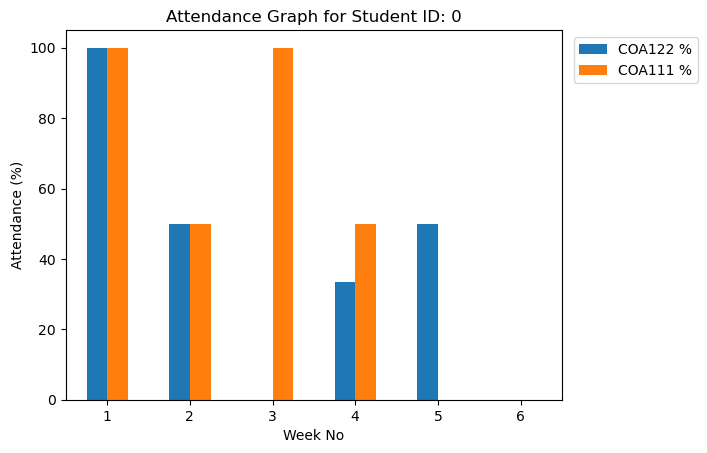

In [53]:
get_student_att(0)